# Dataset

In [ ]:
!wget https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv

--2022-06-19 02:58:22--  https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/re8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4649304 (4.4M) [text/plain]
Saving to: ‘re8.csv’

re8.csv             100%[===================>]   4.43M  --.-KB/s    in 0.08s   

2022-06-19 02:58:22 (54.9 MB/s) - ‘re8.csv’ saved [4649304/4649304]



In [ ]:
# Importando manualemnte as bibliotecas necessarias pybind11 e graph-walker
!pip install pybind11
!pip install graph-walker
!pip install git+https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 213 kB 5.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for graph-walker: filename=graph_walker-1.0.6-cp37-cp37m-linux_x86_64.whl size=985742 sha256=03f4c77cf82ad9a7b5773f31d6ed5dfb1d64ab64acfc2a60cfeacc59fef4ab69
  Stored in directory: /root/.cache/pip/wheels/1c/8e/23/fd6bb153064bb1f549a21a8ffef720aba09f01d4ae43866c5e
Successfully built graph-walker
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git to /tmp/pip-req-build-2wqai9yr
  Running command git clone -q https://github.com/AlvaroJoseLopes/Deep-Walk-Transformers.git /tmp/pip-req-build-2wqai9yr
  Created wheel for deep-walk-transformers: filename=deep_walk_transformers-0.0.7-py3-none-any.whl size=7701 

In [ ]:
import pandas as pd 

df = pd.read_csv('re8.csv')
df

,file_name,text,class
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq
4,acq.6302.txt,cooper canada said it received takeover offers...,acq
...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade


In [ ]:
df['label'] = df['class'].astype('category').cat.codes
df

,file_name,text,class,label
0,acq.4342.txt,mcdowell me to merger with interpharm inc mcdo...,acq,0
1,acq.5302.txt,intermagnetics general inma completes buy inte...,acq,0
2,acq.8530.txt,tesco extends hillards offer tesco plc tsco l ...,acq,0
3,acq.3841.txt,healthvest hvt sells shares healthvest a maryl...,acq,0
4,acq.6302.txt,cooper canada said it received takeover offers...,acq,0
...,...,...,...,...
7669,trade.1829.txt,japan will not retaliate now against u s tarif...,trade,7
7670,trade.4403.txt,koreans to buy billion dlrs in u s goods south...,trade,7
7671,trade.6944.txt,belgolux trade swings into january deficit the...,trade,7
7672,trade.7420.txt,nakasone to visit washington in late april pri...,trade,7


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,file_name,text,class,label
0,acq.7863.txt,gencorp says it expects to complete sale of wo...,acq,0
1,earn.4637.txt,asbestec industries asbs sets stock split asbe...,earn,2
2,money_fx.1161.txt,industrial nations reconvene for talks financi...,money,5
3,earn.5792.txt,sensormatic electronics corp snsr rd qtr net f...,earn,2
4,earn.2732.txt,loral corp lor nd qtr sept shr cts vs cts net ...,earn,2
...,...,...,...,...
7669,earn.1664.txt,computrac llb sees lower first quarter net com...,earn,2
7670,earn.1405.txt,newhall resources nr qtly distribution shr cts...,earn,2
7671,acq.4384.txt,wall street stocks american express axp americ...,acq,0
7672,earn.1896.txt,detection systems detc o year end march shr ct...,earn,2


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.7 MB/s 
     |████████████████████████████████| 4.4 MB 28.3 MB/s 
     |████████████████████████████████| 1.2 MB 50.1 MB/s 
     |████████████████████████████████| 86 kB 7.4 MB/s 
     |████████████████████████████████| 6.6 MB 48.5 MB/s 
     |████████████████████████████████| 596 kB 69.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=9e531d34c7f8acb9aedb5f6e274e2e598bebd1748bf0625e5e30e16fe00aedbf
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


embeddings = model.encode(df.text.to_list())


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
df['embeddings'] = list(embeddings)
df

,file_name,text,class,label,embeddings
0,acq.7863.txt,gencorp says it expects to complete sale of wo...,acq,0,"[-0.26712504, 0.23963311, 0.38883796, -0.80601..."
1,earn.4637.txt,asbestec industries asbs sets stock split asbe...,earn,2,"[0.048990138, -0.2902725, -0.6848031, 0.023989..."
2,money_fx.1161.txt,industrial nations reconvene for talks financi...,money,5,"[-0.02765992, -0.11035091, -0.112367816, -0.08..."
3,earn.5792.txt,sensormatic electronics corp snsr rd qtr net f...,earn,2,"[-0.47364026, -0.054153915, 0.18931165, -0.024..."
4,earn.2732.txt,loral corp lor nd qtr sept shr cts vs cts net ...,earn,2,"[-0.48537135, -0.070277296, 0.07411789, -0.064..."
...,...,...,...,...,...
7669,earn.1664.txt,computrac llb sees lower first quarter net com...,earn,2,"[-0.32281798, -0.3985926, 0.05970829, -0.26616..."
7670,earn.1405.txt,newhall resources nr qtly distribution shr cts...,earn,2,"[-0.49113575, -0.3345898, 0.21903457, -0.01767..."
7671,acq.4384.txt,wall street stocks american express axp americ...,acq,0,"[-0.08706723, -0.639022, 0.31823248, 0.0055265..."
7672,earn.1896.txt,detection systems detc o year end march shr ct...,earn,2,"[-0.73429006, -0.20172316, 0.026228247, -0.183..."


# Construindo o Grafo

In [ ]:
from sklearn.neighbors import kneighbors_graph
import numpy as np
A = kneighbors_graph(np.array(df['embeddings'].to_list()), n_neighbors=5, metric="cosine")

In [ ]:
import networkx as nx 
G = nx.Graph(A)

In [ ]:
G.number_of_nodes()

7674

# Utilizando a API

In [ ]:
num_walks = 50
walk_len = 10
embed_dim = 32
mask_rate = 0.5
starting_nodes = None
batch_size = 128
epochs = 10
lr = 0.0001

In [ ]:
from deep_walk_transformers.deep_walk_transformers import DeepWalkTransformers
dwt = DeepWalkTransformers(
    num_walks,
    walk_len,
    mask_rate,
    embed_dim
)
dwt.fit(G, starting_nodes, batch_size, epochs, lr)

Random walks - T=0.28s
Walks shape: (383700, 10)


Building X_paths and X_positions:   0%|          | 0/383700 [00:00<?, ?it/s]

Getting Vectorize Layer ...
Encoding texts ...
Getting masked input (mask token id = 7676) ...
Building Masked Language Bert Model ...
Fake Training MLM model ... 
Training model for 20 epochs ...
Epoch 1/20
eh pra entrar aqui!!!
eh pra entrar aqui!!!
2998/2998 [==============================] - 29s 9ms/step - loss: 8.9061
Epoch 2/20
2998/2998 [==============================] - 28s 9ms/step - loss: 8.8492
Epoch 3/20
2998/2998 [==============================] - 28s 9ms/step - loss: 8.8265
Epoch 4/20
2998/2998 [==============================] - 28s 9ms/step - loss: 8.8096
Epoch 5/20
2998/2998 [==============================] - 28s 9ms/step - loss: 8.7885
Epoch 6/20
2998/2998 [==============================] - 28s 9ms/step - loss: 8.7672
Epoch 7/20
2998/2998 [==============================] - 28s 9ms/step - loss: 8.7478
Epoch 8/20
2998/2998 [==============================] - 28s 9ms/step - loss: 8.7297
Epoch 9/20
2998/2998 [==============================] - 28s 9ms/step - loss: 8.7114
Epo

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

def evaluate(df_embed, labels):
    # avaliando com clustering
    # kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=0).fit(df_emb_train)
    # kmeans.labels_
    # print('---> DeepWalk Transformers (clustering): ', normalized_mutual_info_score(kmeans.labels_, labels))

    # avaliando com classificacao
    print("\n\n\n---> DeepWalk Transformers (classification)")
    clf_train, clf_test, clf_train_y, clf_test_y  = train_test_split(df_embed, labels, test_size=0.3, random_state=42)
    clf = LinearSVC()
    clf.fit(clf_train, clf_train_y)
    print(classification_report(clf_test_y, clf.predict(clf_test)))

In [ ]:
node_embeddings = dwt.get_embeddings()
df_embed = pd.DataFrame.from_dict(node_embeddings, orient='index')

In [ ]:
df_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.168333,5.879187,-6.889097,-1.163420,-0.910844,4.103133,0.717770,-0.600349,1.126243,0.781145,...,-1.794419,-5.531311,-0.528085,2.847359,-4.381840,-2.614606,3.442532,-2.194504,-0.117278,4.402426
1,1.489573,-0.145061,1.912567,-1.523346,2.154520,4.661669,-1.529720,1.210632,-5.365837,-0.932851,...,-4.830324,3.013127,-0.666720,-0.738731,0.216229,0.224171,-2.524164,3.457688,0.176003,3.151087
2,3.671562,5.202929,-4.641783,-0.802567,-1.383872,5.106241,-0.267379,-0.757206,-1.282108,-1.142795,...,-3.158773,-4.572819,0.579977,1.832567,-2.761079,-3.600505,3.122746,-0.615484,0.488494,4.410573
3,-3.285556,-6.253935,6.351490,0.893964,-0.889441,-4.268593,-0.878033,0.419629,-1.121584,0.405565,...,1.308255,6.141649,0.192929,-1.875186,3.431734,3.242849,-3.853486,3.267524,-0.715692,-5.808508
4,-3.071841,-5.972037,6.140717,0.998344,-0.979715,-4.386823,-0.792152,0.285263,-1.045023,0.276145,...,1.346843,5.908482,0.257988,-1.863784,3.358975,3.075014,-3.749012,3.106575,-0.670051,-5.752312


In [ ]:
df_embed.shape

(7674, 32)

In [ ]:
evaluate(df_embed, df.label.to_list())




---> DeepWalk Transformers (classification)
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       667
           1       0.23      0.53      0.32       103
           2       0.97      0.93      0.95      1182
           3       0.00      0.00      0.00        18
           4       0.37      0.31      0.34        81
           5       0.65      0.15      0.24        87
           6       0.00      0.00      0.00        53
           7       0.44      0.49      0.46       112

    accuracy                           0.81      2303
   macro avg       0.44      0.42      0.40      2303
weighted avg       0.82      0.81      0.81      2303



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

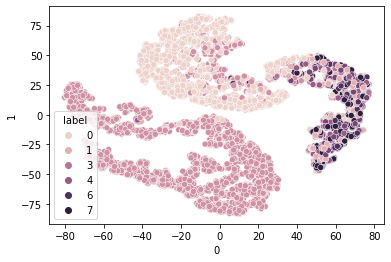

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(df_embed)

df_tsne = pd.DataFrame(X_embedded)
df_tsne['label'] = df.label.to_list()
sns.scatterplot(data=df_tsne, x=0, y=1, hue="label")